<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/U_net_image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

In [8]:
def generate_dataset(num_samples=100, image_shape=(256, 256), num_objects=10):
    images = np.zeros((num_samples, *image_shape, 1), dtype=np.float32)
    mask = np.zeros((num_samples, *image_shape, 1), dtype=np.float32)
    for i in range(num_samples):
        for _ in range(num_samples):
            obj_width = np.random.randint(10, 50)
            obj_height = np.random.randint(10, 50)
            x = np.random.randint(0, image_shape[0] - obj_width)
            y = np.random.randint(0, image_shape[1] - obj_height)
            images[i, x:x + obj_width, y:y + obj_height, 0] = 1.0
            mask[i, x:x + obj_width, y:y + obj_height, 0] = 1.0
    return images, mask

In [9]:
X,y = generate_dataset()


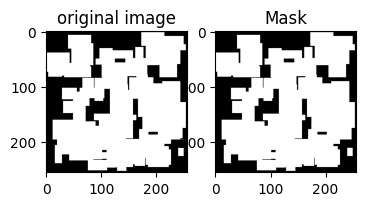

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(y[0],cmap='gray')

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Conv2DTranspose,concatenate
from tensorflow.keras.models import Model
def u_net(input_shape=(256,256,1)):
  input = Input(input_shape)
  conv1 = Conv2D(32,3,activation='relu',padding='same')(input)
  conv1 = Conv2D(32,3,activation='relu',padding='same')(conv1)
  pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

  conv2 = Conv2D(64,3,activation='relu',padding='same')(pool1)
  conv2 = Conv2D(64,3,activation='relu',padding='same')(conv2)
  pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

  conv3 = Conv2D(128,3,activation='relu',padding='same')(pool2)
  conv3 = Conv2D(128,3,activation='relu',padding='same')(conv3)

# decoder

  up4 = concatenate([Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(conv3),conv2],axis=3)
  conv4 = Conv2D(64,3,activation='relu',padding='same')(up4)
  conv4 = Conv2D(64,3,activation='relu',padding='same')(conv4)

  up5 = concatenate([Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(conv4),conv1],axis=3)
  conv5 = Conv2D(32,3,activation='relu',padding='same')(up5)
  conv5 = Conv2D(32,3,activation='relu',padding='same')(conv5)

  output = Conv2D(1,1,activation='sigmoid')(conv5)

  model = Model(inputs=input,outputs=output)
  return model

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)


In [27]:
model = u_net()

In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(xtrain,ytrain,epochs=10,batch_size=16)

Epoch 1/10
5/5 [==============================] - 55s 11s/step - loss: 0.5577 - accuracy: 0.6907
Epoch 2/10
5/5 [==============================] - 53s 11s/step - loss: 0.3473 - accuracy: 0.7610
Epoch 3/10
5/5 [==============================] - 53s 11s/step - loss: 0.2503 - accuracy: 0.9369
Epoch 4/10
5/5 [==============================] - 53s 11s/step - loss: 0.1054 - accuracy: 0.9842
Epoch 5/10
5/5 [==============================] - 53s 11s/step - loss: 0.0561 - accuracy: 0.9831
Epoch 6/10
5/5 [==============================] - 53s 10s/step - loss: 0.0301 - accuracy: 0.9898
Epoch 7/10
5/5 [==============================] - 53s 11s/step - loss: 0.0222 - accuracy: 0.9942
Epoch 8/10
5/5 [==============================] - 53s 11s/step - loss: 0.0207 - accuracy: 0.9941
Epoch 9/10
5/5 [==============================] - 53s 11s/step - loss: 0.0149 - accuracy: 0.9955
Epoch 10/10
5/5 [==============================] - 53s 11s/step - loss: 0.0122 - accuracy: 0.9961


In [30]:
model.evaluate(xtest,ytest)

1/1 [==============================] - 6s 6s/step - loss: 0.0112 - accuracy: 0.9958


[0.011199821718037128, 0.9957504272460938]

In [31]:
pred=model.predict(xtest)

1/1 [==============================] - 4s 4s/step


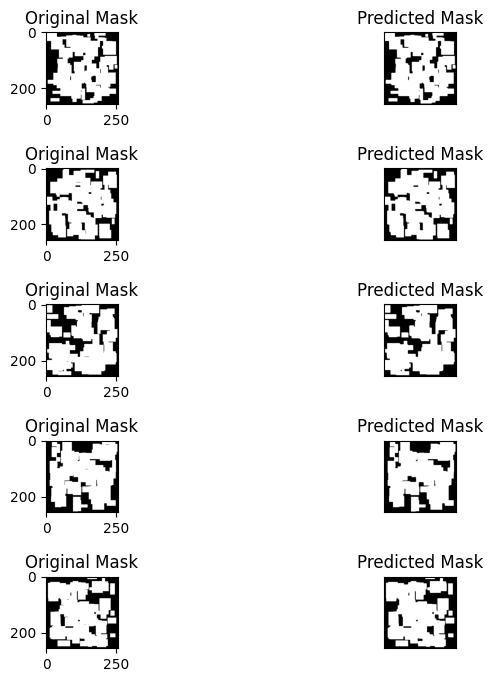

In [40]:
j = 1
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.9)  # Increase vertical spacing between subplots
for i in range(5):
    plt.subplot(5, 2, j)
    plt.title("Original Mask")
    plt.imshow(ytest[i].squeeze(), cmap='gray')
    j += 1
    plt.subplot(5, 2, j)
    plt.title("Predicted Mask")
    plt.imshow(pred[i].squeeze(), cmap='gray')
    j += 1
    plt.xticks([])
    plt.yticks([])

plt.show()
